In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from matplotlib import style
import matplotlib.patches as mpatches
import numpy as np
import glob
import os

In [53]:
#put the files together and read them
joined_files = os.path.join("Data/20*-*-city-of-london-street.csv")

joined_list = glob.glob(joined_files)

df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

print(df)

                                                Crime ID    Month  \
0      356f6e3b1e3585e37630f2c954e85b55b949d862a46472...  2017-01   
1      425136f379532188f454a14ab804f1b06e31ce87ca4fa2...  2017-01   
2      f67748242989f072c1739c336701b5389ed91c8b524690...  2017-01   
3      e05ff11a48d2201cc547639bc162ccb2dc24253642ef0b...  2017-01   
4                                                    NaN  2017-01   
...                                                  ...      ...   
38210  5d59b49a222ac360447a0f9e165ec612822f85919d55aa...  2021-12   
38211  b7a57e10d3f83535bb509ebd58470993c3d64ee6ac1680...  2021-12   
38212  338e1dda5b3f65ec017a7a8d22bd4c4e9d75a6194faf6b...  2021-12   
38213  192f750158a543acee8f1ca16d7093e6456b0b056d27b5...  2021-12   
38214  4dd18d5f01d4a8013ff0a85dd606f3ff0e23c49032fe8b...  2021-12   

                 Reported by           Falls within  Longitude   Latitude  \
0      City of London Police  City of London Police  -0.111497  51.518226   
1      City of Lo

In [54]:
#check what the df looks like
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,356f6e3b1e3585e37630f2c954e85b55b949d862a46472...,2017-01,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Under investigation,NaN
1,425136f379532188f454a14ab804f1b06e31ce87ca4fa2...,2017-01,City of London Police,City of London Police,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Other theft,Under investigation,NaN
2,f67748242989f072c1739c336701b5389ed91c8b524690...,2017-01,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Under investigation,NaN
3,e05ff11a48d2201cc547639bc162ccb2dc24253642ef0b...,2017-01,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Under investigation,NaN
4,NaN,2017-01,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN


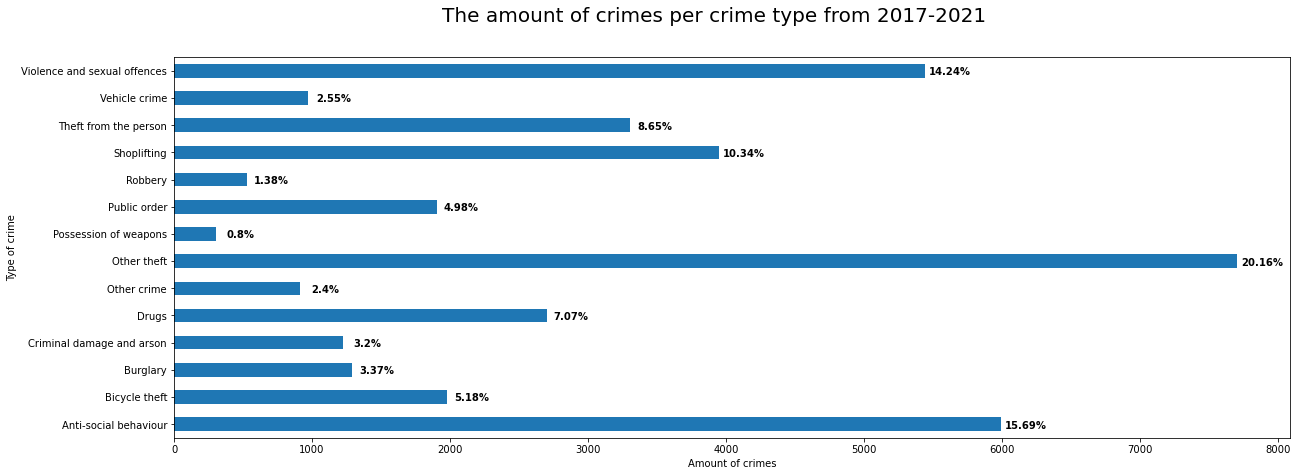

In [55]:
#count the amount of crime per crime type
df_crime = df.groupby('Crime type').count()

#make empty list
percentage = []

#get percentage and put them in empty list
for num in df_crime['Reported by']:
    pct = (num / len(df)) * 100
    percentage.append(round(pct, 2))

#put the list in the dataframe
df_crime['Percentage'] = percentage

#make subplot
fig, ax = plt.subplots()

#plot the bar chart
df_crime['Reported by'].plot(kind='barh', ax=ax, figsize = (20,7))

#put in labels
fig.suptitle('The amount of crimes per crime type from 2017-2021', fontsize=20)
plt.ylabel('Type of crime')
plt.xlabel('Amount of crimes');

#put in the percentages in the graph
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x + width + 180,
             y + height - 0.4,
             str(df_crime.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()

# plt.savefig('amount per type of crime 2017-2021.png')

In [56]:
#check what the df looks like
df_crime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Last outcome category,Context,Percentage
Crime type,,,,,,,,,,,,
Anti-social behaviour,0,5997,5997,5997,5720,5720,5997,5720,5720,0,0,15.69
Bicycle theft,1978,1978,1978,1978,1910,1910,1978,1910,1910,1978,0,5.18
Burglary,1288,1288,1288,1288,1224,1224,1288,1224,1224,1288,0,3.37
Criminal damage and arson,1223,1223,1223,1223,1171,1171,1223,1171,1171,1223,0,3.20
Drugs,2700,2700,2700,2700,2426,2426,2700,2426,2426,2700,0,7.07


In [57]:
#check missing data in df
df_missing = df.isnull().sum()

df_missing

# df_missing.plot(kind='barh')

Crime ID                  5997
Month                        0
Reported by                  0
Falls within                 0
Longitude                 2701
Latitude                  2701
Location                     0
LSOA code                 2701
LSOA name                 2701
Crime type                   0
Last outcome category     5997
Context                  38215
dtype: int64

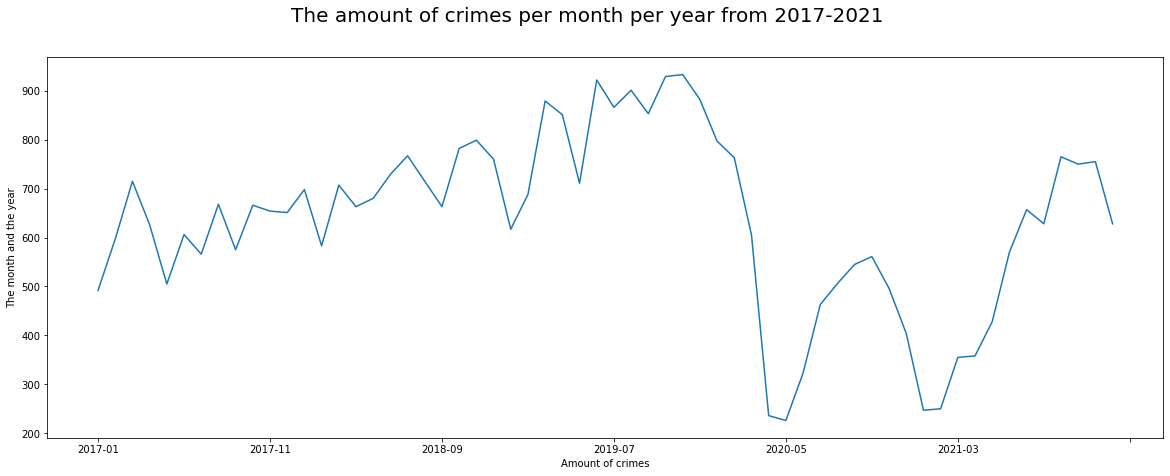

In [58]:
#plot the data per month
df_dist = df.groupby('Month').count()

fig, ax = plt.subplots()

df_dist['Reported by'].plot(ax=ax, figsize = (20,7))

fig.suptitle('The amount of crimes per month per year from 2017-2021', fontsize=20)
plt.ylabel('The month and the year')
plt.xlabel('Amount of crimes');
# plt.savefig('amount per month per year 2017-2021.png')

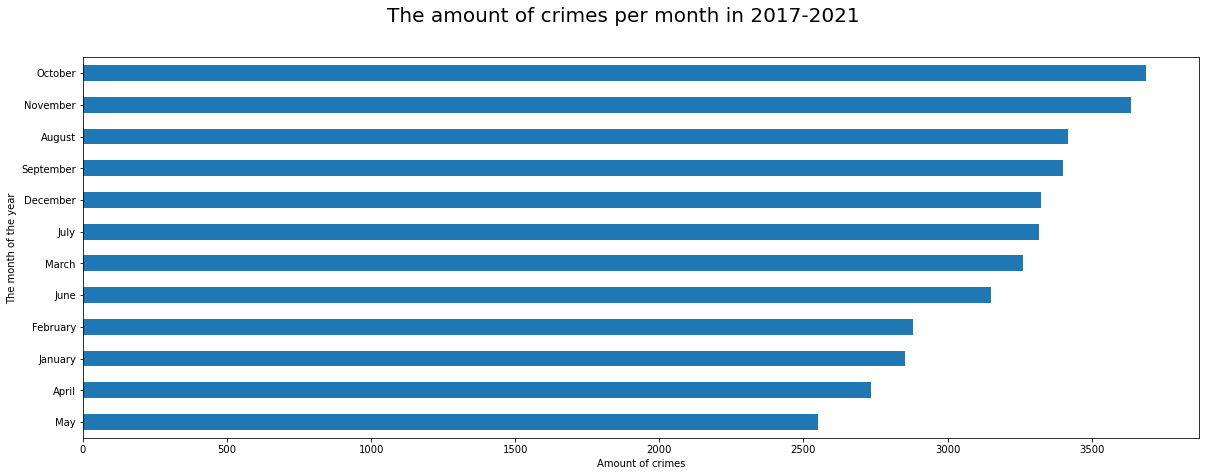

In [59]:
dfc = df.copy()
dfc['Month'] = pd.to_datetime(dfc['Month'])

dfc = dfc.groupby(dfc['Month'].dt.strftime('%B'))['Reported by'].count().sort_values()

fig, ax = plt.subplots()

dfc.plot(kind='barh', ax=ax, figsize = (20,7))

fig.suptitle('The amount of crimes per month in 2017-2021', fontsize=20)
plt.ylabel('The month of the year')
plt.xlabel('Amount of crimes');

# plt.savefig('crime per month 2017-2021.png')

In [60]:
#is for plotting the crimes on the map, just gonna leave this here
# BBox = (df['Longitude'].min(), df['Longitude'].max(), df['Latitude'].min(), df['Latitude'].max())

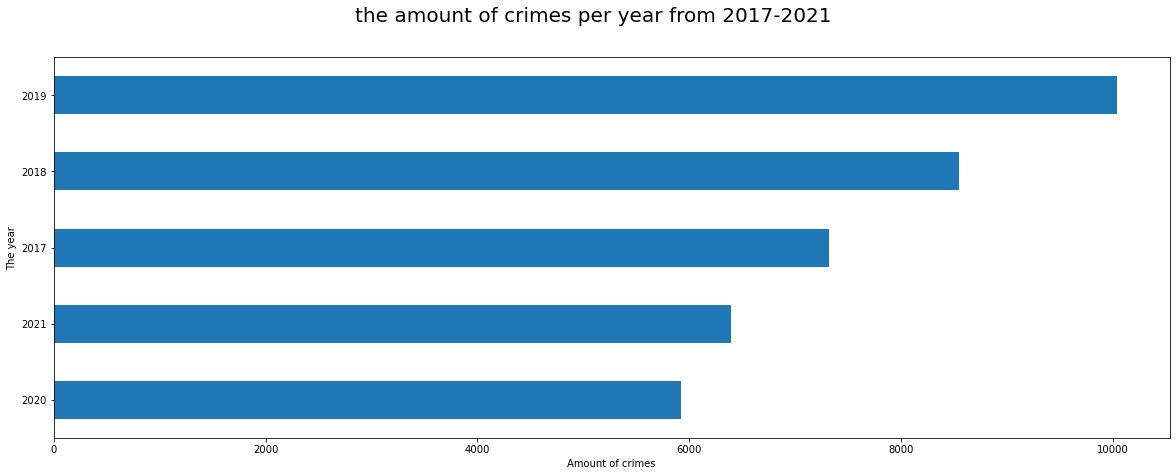

In [61]:

dfc = df.copy()
dfc['Month'] = pd.to_datetime(dfc['Month'])

dfc = dfc.groupby(dfc['Month'].dt.strftime('%Y'))['Reported by'].count().sort_values()

fig, ax = plt.subplots()

dfc.plot(kind='barh', ax=ax, figsize = (20,7))

fig.suptitle('the amount of crimes per year from 2017-2021', fontsize=20)
plt.ylabel('The year')
plt.xlabel('Amount of crimes');

# plt.savefig('crime per year 2019-2021.png')

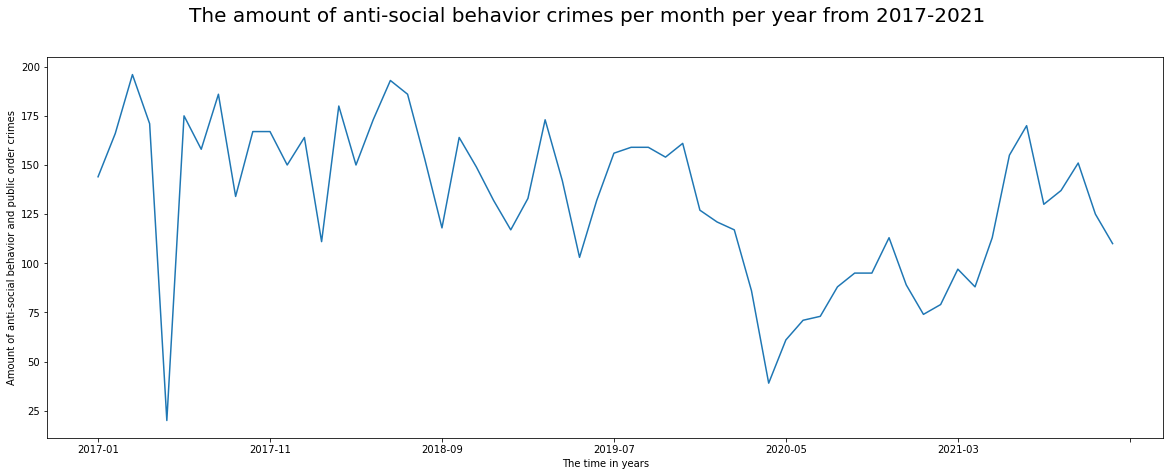

In [62]:
#make a df with only anti-social behaviour
dfw = df[(df['Crime type'] == 'Anti-social behaviour') | (df['Crime type'] == 'Public order')]
dfw = dfw.reset_index(drop=True)

dfw_dist = dfw.groupby('Month').count()

fig, ax = plt.subplots()

dfw_dist['Reported by'].plot(ax=ax, figsize = (20,7))

fig.suptitle('The amount of anti-social behavior crimes per month per year from 2017-2021', fontsize=20)
plt.ylabel('Amount of anti-social behavior and public order crimes')
plt.xlabel('The time in years');
# plt.savefig('amount of anti-social behavior and public order per month per year 2017-2021.png')

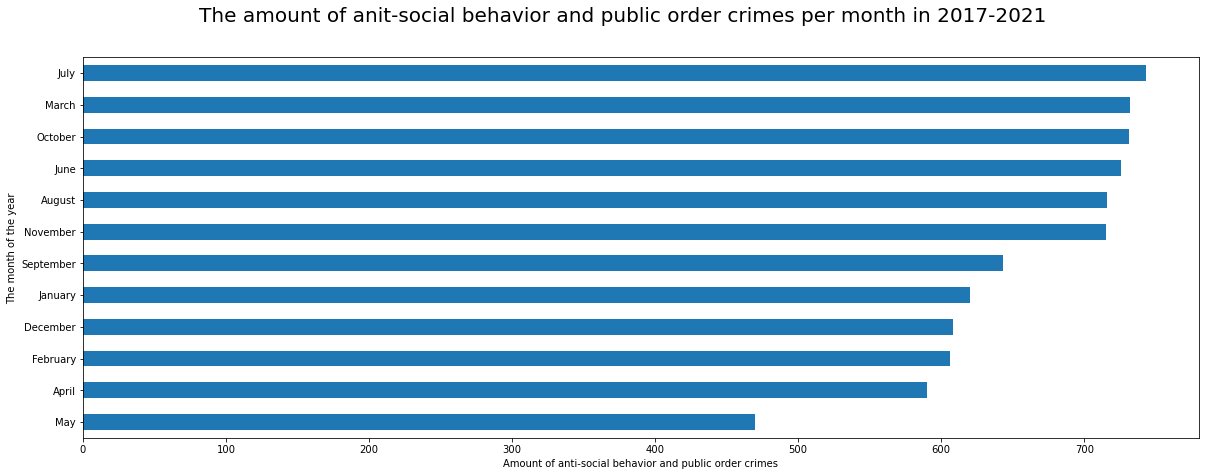

In [63]:
dfwt = dfw.copy()
dfwt['Month'] = pd.to_datetime(dfwt['Month'])

dfwt = dfwt.groupby(dfwt['Month'].dt.strftime('%B'))['Reported by'].count().sort_values()

fig, ax = plt.subplots()

dfwt.plot(kind='barh', ax=ax, figsize = (20,7))

fig.suptitle('The amount of anit-social behavior and public order crimes per month in 2017-2021', fontsize=20)
plt.ylabel('The month of the year')
plt.xlabel('Amount of anti-social behavior and public order crimes');

# plt.savefig('anit-social behavior crime per month 2017-2021.png')

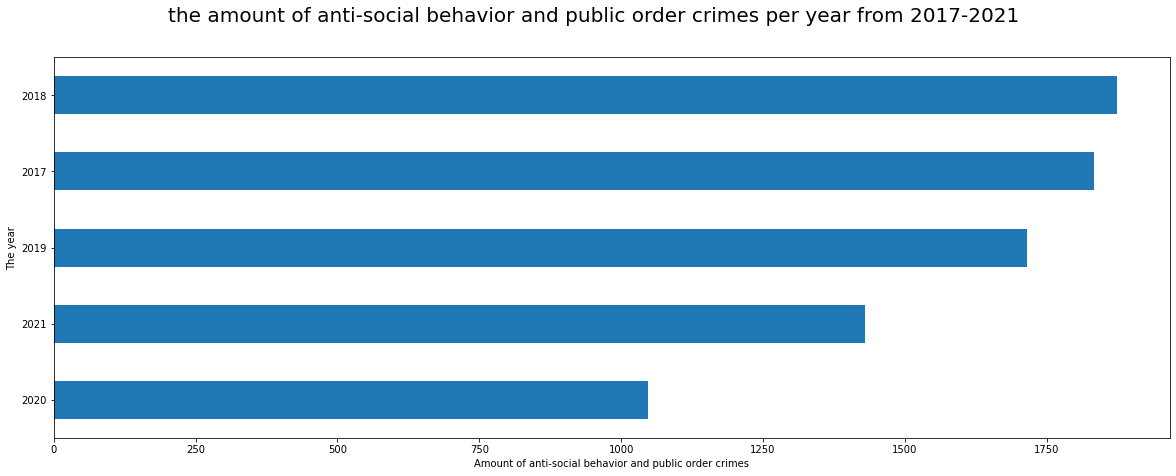

In [64]:
dfwt = dfw.copy()
dfwt['Month'] = pd.to_datetime(dfwt['Month'])

dfwt = dfwt.groupby(dfwt['Month'].dt.strftime('%Y'))['Reported by'].count().sort_values()

fig, ax = plt.subplots()

dfwt.plot(kind='barh', ax=ax, figsize = (20,7))

fig.suptitle('the amount of anti-social behavior and public order crimes per year from 2017-2021', fontsize=20)
plt.ylabel('The year')
plt.xlabel('Amount of anti-social behavior and public order crimes');

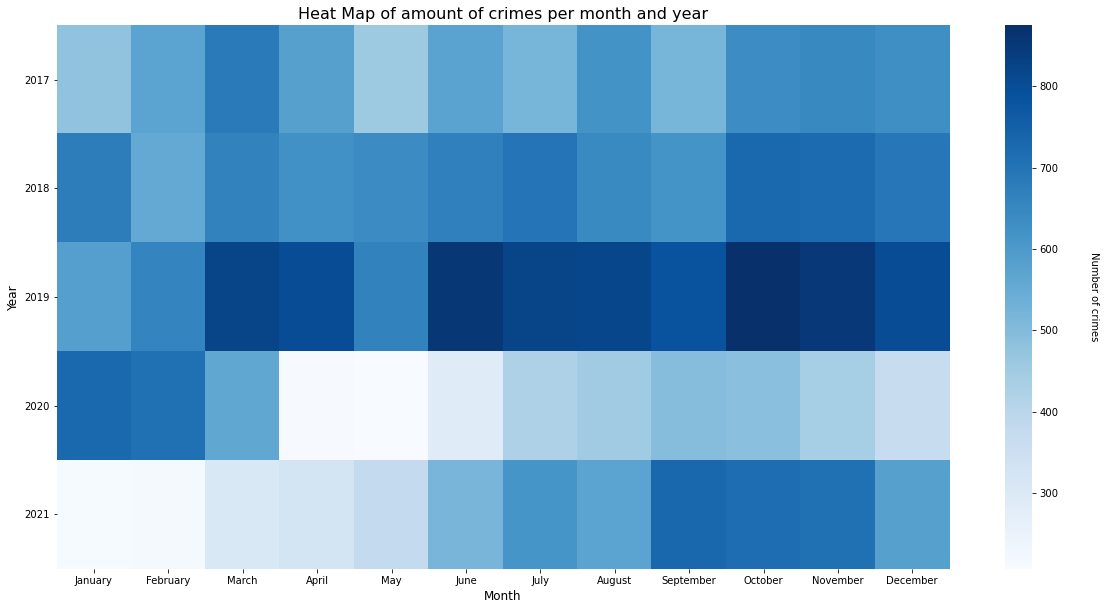

In [65]:
df_heat = df.copy()
df_heat['Month'] = pd.to_datetime(df_heat['Month'])

time_df = pd.DataFrame(df_heat.groupby([df_heat.Month.dt.year, df_heat.Month.dt.month]).describe()['Longitude']['count'])

x_labels=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(20,10))
heat = sns.heatmap(time_df.unstack(), xticklabels=x_labels, cmap='Blues');
plt.yticks(rotation=0) 
heat.set_title('Heat Map of amount of crimes per month and year', size=16)
heat.set_xlabel('Month', size=12)
heat.set_ylabel('Year', size=12)
cbar = heat.collections[0].colorbar
cbar.set_label('Number of crimes', labelpad=40, rotation=270);


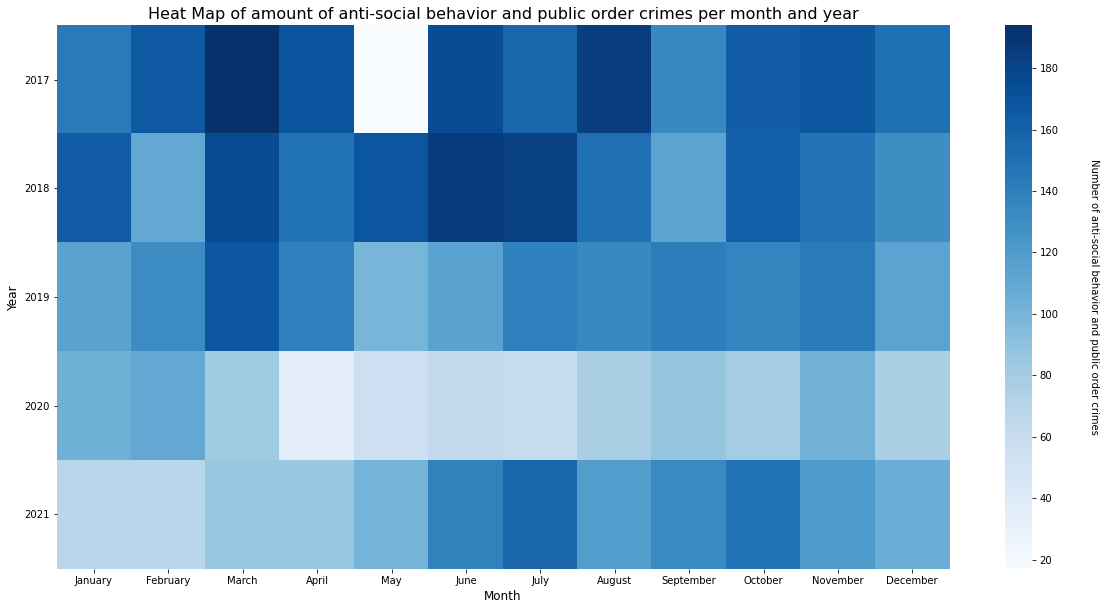

In [66]:
dfw_heat = dfw.copy()
dfw_heat['Month'] = pd.to_datetime(dfw_heat['Month'])

time_df = pd.DataFrame(dfw_heat.groupby([dfw_heat.Month.dt.year, dfw_heat.Month.dt.month]).describe()['Longitude']['count'])

x_labels=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(20,10))
heat = sns.heatmap(time_df.unstack(), xticklabels=x_labels, cmap='Blues');
plt.yticks(rotation=0) 
heat.set_title('Heat Map of amount of anti-social behavior and public order crimes per month and year', size=16)
heat.set_xlabel('Month', size=12)
heat.set_ylabel('Year', size=12)
cbar = heat.collections[0].colorbar
cbar.set_label('Number of anti-social behavior and public order crimes', labelpad=40, rotation=270);